In [88]:
!pip install torch==1.7.1
# !pip install -q --user torch==1.4.0 -f
!pip install transformers
!pip install sentencepiece==0.1.94
!pip install ipywidgets
!pip install rouge
!pip install python-meteor

In [89]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
import torch
import json 
from transformers import T5Tokenizer, T5ForConditionalGeneration, T5Config

# model = T5ForConditionalGeneration.from_pretrained('t5-large')
# tokenizer = T5Tokenizer.from_pretrained('t5-large')

model = T5ForConditionalGeneration.from_pretrained('t5-small')
tokenizer = T5Tokenizer.from_pretrained('t5-small')

In [90]:
model = model.to('cuda' if torch.cuda.is_available() else "cpu")
device = torch.device('cuda' if torch.cuda.is_available() else "cpu")

In [91]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [100]:
# WikiHow_sample = pd.read_csv('/content/gdrive/MyDrive/SNLP_Coursework/WikiHow_sample.csv')
WikiHow_sample_leq512 = pd.read_csv('/content/gdrive/MyDrive/SNLP_Coursework/WikiHow_sample_leq512_reorder_withsummary.csv')

In [15]:
# WikiHow_sample_leq512 = WikiHow_sample[WikiHow_sample['text_length']<512]

In [110]:
len(WikiHow_sample_leq512)/32

2202.28125

In [52]:
# WikiHow_sample_leq512_reorder = pd.concat([WikiHow_sample_leq512[WikiHow_sample_leq512['summary'] != 'empty' ], WikiHow_sample_leq512[WikiHow_sample_leq512['summary'] == 'empty' ]], ignore_index=True)

In [94]:
def preprocess(text):
  preprocess_text = text.strip().replace("\n","")
  t5_prepared_Text = "summarize: "+preprocess_text
  # print ("Preprocessed and prepared text: \n", t5_prepared_Text)
  # print(len(t5_prepared_Text))
  return t5_prepared_Text, len(preprocess_text.split())

In [95]:
def summarize(t5_prepared_Text,ml):
  # preprocess_text = text.strip().replace("\n","")
  # t5_prepared_Text = "summarize: "+preprocess_text
  # print ("Preprocessed and prepared text: \n", t5_prepared_Text)

  tokenized_text = tokenizer.encode(t5_prepared_Text, max_length=512, return_tensors="pt").to(device)

  # summmarize 
  # summary_ids = model.generate(tokenized_text,
  #                                     num_beams=4,
  #                                     no_repeat_ngram_size=2,
  #                                     min_length=30,
  #                                     max_length=ml,
  #                                     early_stopping=True)
  
  summary_ids = model.generate(tokenized_text,
              max_length= ml,
              num_beams=2,
              repetition_penalty=2.5, 
              length_penalty=1.0, 
              early_stopping=True)

  output = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
  return output

In [8]:
# WikiHow_sample['summary']='empty'
# WikiHow_sample['train_length'] = 0

In [96]:
def get_epoch(which_epoch, epoch_amount, data_length):
  epoch_size = math.floor(data_length/epoch_amount)
  if which_epoch == epoch_amount:
    indecies = list(range((which_epoch-1)*epoch_size))
  else:
    indecies = list(range((which_epoch-1)*epoch_size, which_epoch*epoch_size))
  return indecies

In [103]:
temp = pd.read_csv('/content/gdrive/MyDrive/SNLP_Coursework/WikiHow_sample_leq512_withsummary.csv')

In [108]:
WikiHow_sample_leq512[WikiHow_sample_leq512['summary']!='empty']

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,headline,title,text,text_length,summary,train_length
0,0,0,0,33101,"\nAvoid abrasive clothing-on-skin contact.,\nR...",How to Care for Skin During Winter3,While it's always a good idea to cover up whe...,397,itching is a great way to cause infections by ...,392
1,1,1,1,100054,\nGo to Data tab and select From Other Sources...,How to Embed a SQL Query in Microsoft Excel,";\n,, Select “ODBC DSN” from the available opt...",70,select the database and table as appropriate i...,64
2,2,2,2,83773,"\nTease her.,\nMake up ridiculous stories.,\nE...",How to Reply to One Word Texts from Girls2,Since she is only sending you one word text m...,469,make sure you are appropriate with your teasin...,464
3,3,5,5,101588,"\nLaunch the Microsoft Word mobile app.,\nOpen...",How to Check a Word Count in Microsoft Word3,"On your smartphone or tablet, tap on the Word...",218,the app will usually open the last document yo...,210
4,4,7,7,84304,\nWhen thinking of confronting someone(if you ...,How to Verbally Express Yourself Without Fear,know what you wish to achieve with this verba...,143,donna brazile: your intentions must be absolut...,141
...,...,...,...,...,...,...,...,...,...,...
4400,4400,6267,6267,202360,"\nCut a length of foil tape (copper, silver or...",How to Make Bangles from Plastic Bottles3,Allow a small overlap as well as the size of ...,221,the join should meet in the middle of the outs...,211
4401,4401,6268,6268,141292,"\nSign into your Facebook account.,\nPost a st...",How to Put Spell Check on Facebook4,Create a new Internet Explorer browsing tab a...,173,"if not yet signed in, enter your account detai...",167
4402,4402,6270,6270,11589,"\nResearch leadership.,\nDefine leadership in ...",How to Write a Scholarship Essay on Leadership2,"Simply put, leadership is the ability of some...",462,you need an even deeper understanding of the t...,452
4403,4403,6271,6271,187088,"\nClean the mess up immediately.,\nUse ammonia...",How to Clean Stone Tile2,Stone will soak up spills quickly because it ...,262,rust occurs when metal oxidizes during contact...,256


In [101]:
# epoch = get_epoch(2,16,len(WikiHow_sample_leq512))
for i,text in zip(list(range(3268,4405)),WikiHow_sample_leq512['text'][3268:4405]):
  t5_prepared_Text,train_length = preprocess(text)
    # print(ml)
  ml = round(0.33 * train_length)
  WikiHow_sample_leq512['train_length'][i] = train_length
  WikiHow_sample_leq512['summary'][i] = summarize(t5_prepared_Text,ml)

WikiHow_sample_leq512.to_csv('WikiHow_sample_leq512_withsummary.csv')
!cp WikiHow_sample_leq512_withsummary.csv "/content/gdrive/My Drive/SNLP_Coursework"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [111]:
epoch = get_epoch(3,32,len(WikiHow_sample_leq512))
for i,text in zip(epoch,WikiHow_sample_leq512['text'][epoch]):
  t5_prepared_Text,train_length = preprocess(text)
    # print(ml)
  ml = round(0.33 * train_length)
  WikiHow_sample_leq512['train_length'][i] = train_length
  WikiHow_sample_leq512['summary'][i] = summarize(t5_prepared_Text,ml)

WikiHow_sample_leq512.to_csv('WikiHow_sample_leq512_withsummary.csv')
!cp WikiHow_sample_leq512_withsummary.csv "/content/gdrive/My Drive/SNLP_Coursework"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


(array([952., 329., 127.,  67.,  37.,  16.,  14.,   2.,   1.,   1.]),
 array([  31. ,  418.3,  805.6, 1192.9, 1580.2, 1967.5, 2354.8, 2742.1,
        3129.4, 3516.7, 3904. ]),
 <a list of 10 Patch objects>)

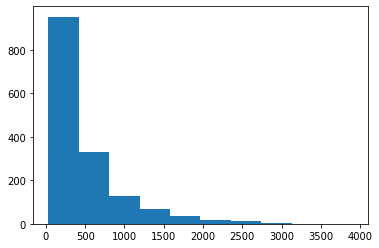

In [33]:
plt.hist(WikiHow_sample['text_length'][epoch])

In [29]:
WikiHow_sample.to_csv('WikiHow_withsummary.csv')
!cp WikiHow_withsummary.csv "/content/gdrive/My Drive/SNLP_Coursework"